In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
headlist = ["Cement","Blast Furnace Slag","Fly Ash","Water","Superplasticizer","Coarse Aggregate","Fine Aggregate","Age","Concrete compressive strength"]
data = pd.read_csv("Concrete_Data_c.csv", header = 0, names = headlist)

data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


C:\Users\13588\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\13588\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\13588\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:>

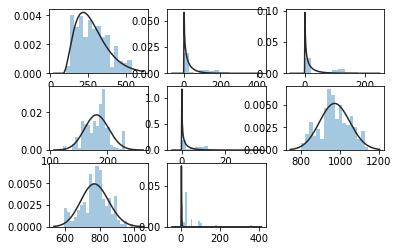

In [22]:
x1 = data.iloc[:,[0]]
x2 = data.iloc[:,[1]]
x3 = data.iloc[:,[2]]
x4 = data.iloc[:,[3]]
x5 = data.iloc[:,[4]]
x6 = data.iloc[:,[5]]
x7 = data.iloc[:,[6]]
x8 = data.iloc[:,[7]]
plt.subplot(331)
sns.distplot(x1,kde=False, fit=stats.gamma)
plt.subplot(332)
sns.distplot(x2,kde=False, fit=stats.gamma)
plt.subplot(333)
sns.distplot(x3,kde=False, fit=stats.gamma)
plt.subplot(334)
sns.distplot(x4,kde=False, fit=stats.gamma)
plt.subplot(335)
sns.distplot(x5,kde=False, fit=stats.gamma)
plt.subplot(336)
sns.distplot(x6,kde=False, fit=stats.gamma)
plt.subplot(337)
sns.distplot(x7,kde=False, fit=stats.gamma)
plt.subplot(338)
sns.distplot(x8,kde=False, fit=stats.gamma)

In [15]:
train_x = data.iloc[:900,[i for i in range(8)]]
train_y = data.iloc[:900,[-1]]
test_x = data.iloc[900:,[i for i in range(8)]]
test_y= data.iloc[900:,[-1]]
train_y["Concrete compressive strength"]

0      79.99
1      61.89
2      40.27
3      41.05
4      44.30
       ...  
895    49.77
896    52.44
897    40.93
898    44.86
899    13.20
Name: Concrete compressive strength, Length: 900, dtype: float64

In [16]:
sum_train_y, sum_test_y = 0.0, 0.0
sum_train_ydiff, sum_test_ydiff = 0.0, 0.0
mean_train_y, mean_test_y = 0.0, 0.0

for i in train_y["Concrete compressive strength"]:
    sum_train_y += i
mean_train_y = sum_train_y / train_y.shape[0]
for j in train_y["Concrete compressive strength"]:
    sum_train_ydiff += (mean_train_y - j) ** 2
variance_train_y = sum_train_ydiff / (train_y.shape[0] - 1)

for i in test_y["Concrete compressive strength"]:
    sum_test_y += i
mean_test_y = sum_test_y / test_y.shape[0]
for j in test_y["Concrete compressive strength"]:
    sum_test_ydiff += (mean_test_y - j) ** 2
variance_test_y = sum_test_ydiff / (test_y.shape[0] - 1)

print("variance_train_y: ",variance_train_y)
print("variance_test_y: ",variance_test_y)

variance_train_y:  296.19673201137056
variance_test_y:  144.82897760286227


# A) Uni-variate linear regression

In [17]:
def uni_var_lr(x, y, m, b):
    # y = f(x) = mx + b
    sum1, sum2, sum3 = 0.0, 0.0, 0.0

    for i in range(x.shape[0]):
        sum1 += (m * x[i] + b - y[i]) ** 2
        sum2 += 2 * x[i] * (m * x[i] + b - y[i])
        sum3 += 2 * (m * x[i] + b - y[i])
    uni_mse = sum1 / x.shape[0]
    uni_deriv = sum2 / x.shape[0]
    uni_deriv_b = sum3 / x.shape[0]
    return uni_mse, uni_deriv, uni_deriv_b

In [18]:
def grad_uni(x, y, m, b, step_size=1e-06, max_iter=1000,stop_crit=1e-06):

    i = 0
    pre_loss, loss, deriv, deriv_b = 0.0, 0.0, 0.0, 0.0
    loss, deriv, deriv_b = uni_var_lr(x, y, m, b)
    m = m - step_size * deriv
    b = b - step_size * deriv_b
    while i < max_iter:
        if abs(pre_loss - loss) < stop_crit:
            break
        else:
            pre_loss = loss
            loss, deriv, deriv_b = uni_var_lr(x, y, m, b)
            m = m - step_size * deriv
            b = b - step_size * deriv_b
            i += 1

    return loss, m, b

In [19]:
def uni_var_lr_tr(x, y, m, b):
    # y = f(x) = mx + b
    sum1, sum2, sum3 = 0.0, 0.0, 0.0

    for i in range(x.shape[0]):
        sum1 += (m * x[i] + b - y[i]) ** 2
        sum2 += 2 * x[i] * (m * x[i] + b - y[i])
        sum3 += 2 * (m * x[i] + b - y[i])
    uni_mse = sum1 / x.shape[0]
    uni_deriv = sum2 / x.shape[0]
    uni_deriv_b = sum3 / x.shape[0]
    uni_explain = 1 - uni_mse / variance_train_y
    return uni_mse, uni_explain, uni_deriv, uni_deriv_b

In [20]:
def uni_var_lr_te(x, y, m, b):
    # y = f(x) = mx + b
    sum1, sum2, sum3 = 0.0, 0.0, 0.0

    for i in range(x.shape[0]):
        sum1 += (m * x[i+900] + b - y[i+900]) ** 2
        sum2 += 2 * x[i+900] * (m * x[i+900] + b - y[i+900])
        sum3 += 2 * (m * x[i+900] + b - y[i+900])
    uni_mse = sum1 / x.shape[0]
    uni_deriv = sum2 / x.shape[0]
    uni_deriv_b = sum3 / x.shape[0]
    uni_explain = 1 - uni_mse / variance_test_y
    return uni_mse, uni_explain, uni_deriv, uni_deriv_b

!!!!Before normalization!!!!

In [21]:
mse1, m1, b1 = grad_uni(train_x["Cement"], train_y["Concrete compressive strength"], 0, 0)# 06
print(mse1, m1, b1)

249.2765055814818 0.11974534253164529 0.031400845062334336


In [57]:
mse2, m2, b2 = grad_uni(train_x["Blast Furnace Slag"], train_y["Concrete compressive strength"], 0, 0)
print(mse2, m2, b2)

1018.7421677422005 0.22262554151725017 0.04349893182389271


In [43]:
mse3, m3, b3 = grad_uni(train_x["Fly Ash"], train_y["Concrete compressive strength"], 0, 0)
print(mse3, m3, b3)

1133.462555454695 0.2781688230131106 0.04764101700054087


In [44]:
mse4, m4, b4 = grad_uni(train_x["Water"], train_y["Concrete compressive strength"], 0, 0) #06
print(mse4, m4, b4)

358.1906864179952 0.19505090564763275 0.003309047614783414


In [45]:
mse5, m5, b5 = grad_uni(train_x["Superplasticizer"], train_y["Concrete compressive strength"], 0, 0)
print(mse5, m5, b5)

1387.2066658141666 0.4763901528180669 0.06991613467963384


In [46]:
mse6, m6, b6 = grad_uni(train_x["Coarse Aggregate"], train_y["Concrete compressive strength"], 0, 0) #06
print(mse6, m6, b6)

322.3494639968913 0.03659637919680731 0.00019092373100246173


In [47]:
mse7, m7, b7 = grad_uni(train_x["Fine Aggregate"], train_y["Concrete compressive strength"], 0, 0) #06
print(mse7, m7, b7)

333.43756683097064 0.0459371527020505 0.0014907944918051562


In [83]:
mse8, m8, b8 = grad_uni(train_x["Age"], train_y["Concrete compressive strength"], 0, 0)
print(mse8, m8, b8)

947.544153046992 0.3126814193929406 0.04478774902610202


In [58]:
uni_var_lr_tr(train_x["Cement"], train_y["Concrete compressive strength"], 0.1198304292230368, 0.0034747056014228315)

(249.36314893907,
 0.15811647466286938,
 0.009463838377613581,
 -3.106108207051017)

In [59]:
uni_var_lr_tr(train_x["Blast Furnace Slag"], train_y["Concrete compressive strength"], 0.22262554151725017, 0.04349893182389271)

(1018.740389892672,
 -2.4394045571494156,
 0.23972259586628247,
 -42.163832867201315)

In [60]:
uni_var_lr_tr(train_x["Fly Ash"], train_y["Concrete compressive strength"], 0.2781688230131106, 0.04764101700054087)

(1133.4604963564448,
 -2.826715064205816,
 0.34482850545223503,
 -45.37593576434209)

In [61]:
uni_var_lr_tr(train_x["Water"], train_y["Concrete compressive strength"],0.19505090564763275, 0.003309047614783414)

(358.19068138755404,
 -0.2092999100807218,
 0.012233172289806034,
 -2.242831184882151)

In [62]:
uni_var_lr_tr(train_x["Superplasticizer"], train_y["Concrete compressive strength"], 0.4763901528180669, 0.06991613467963384)

(1387.006683455374,
 -3.6827210889083304,
 -442.08635881177025,
 -67.07335612795639)

In [63]:
uni_var_lr_tr(train_x["Coarse Aggregate"], train_y["Concrete compressive strength"], 0.03659637919680731, 0.00019092373100246173)

(322.34946301616884,
 -0.08829513690851365,
 1.575603106166818,
 -0.9422095521340398)

In [64]:
uni_var_lr_tr(train_x["Fine Aggregate"], train_y["Concrete compressive strength"], 0.0459371527020505, 0.0014907944918051562)

(333.437564783753,
 -0.12573005961103179,
 0.0018232514631624022,
 -1.4308089683952696)

In [65]:
uni_var_lr_tr(train_x["Age"], train_y["Concrete compressive strength"], 0.3099693576225522, 0.4292942599955387)

(931.29401426192, -2.144173833174395, 0.2962890622457524, -42.00178844454716)

In [67]:
uni_var_lr_te(test_x["Cement"], test_y["Concrete compressive strength"], 0.1198304292230368, 0.0034747056014228315)

(110.92868242971795,
 0.23407121788916319,
 -2495.4571898448153,
 -12.122039212636514)

In [68]:
uni_var_lr_te(test_x["Blast Furnace Slag"], test_y["Concrete compressive strength"], 0.22262554151725017, 0.04349893182389271)

(350.0831327165362, -1.417217455449451, 530.4306591744196, -14.297542402165858)

In [69]:
uni_var_lr_te(test_x["Fly Ash"], test_y["Concrete compressive strength"], 0.2781688230131106, 0.04764101700054087)

(762.2783601027872,
 -4.263300015781664,
 2051.2010859646393,
 -13.823753398180491)

In [70]:
uni_var_lr_te(test_x["Water"], test_y["Concrete compressive strength"],0.19505090564763275, 0.003309047614783414)

(186.88725320325221, -0.2903995892018141, 1893.3982064437887, 9.19216825074279)

In [71]:
uni_var_lr_te(test_x["Superplasticizer"], test_y["Concrete compressive strength"], 0.4763901528180669, 0.06991613467963384)

(915.1818305623132, -5.319051930835603, -472.7527132030507, -55.27633746261343)

In [72]:
uni_var_lr_te(test_x["Coarse Aggregate"], test_y["Concrete compressive strength"], 0.03659637919680731, 0.00019092373100246173)

(165.95740226975673, -0.1458853401895237, 3607.726311203028, 3.156314145979035)

In [73]:
uni_var_lr_te(test_x["Fine Aggregate"], test_y["Concrete compressive strength"], 0.0459371527020505, 0.0014907944918051562)

(171.51971762330723,
 -0.1842914343677413,
 4783.7912250408635,
 5.462569039239674)

In [74]:
uni_var_lr_te(test_x["Age"], test_y["Concrete compressive strength"], 0.3099693576225522, 0.4292942599955387)

(666.028411390658, -3.598723421337576, -1279.8340302265497, -45.70835822237676)

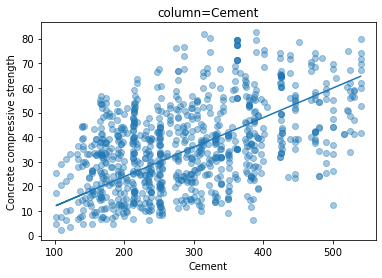

In [168]:
plt.title("column=Cement")
plt.xlabel('Cement')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x["Cement"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x["Cement"], m1*train_x["Cement"]+b1)

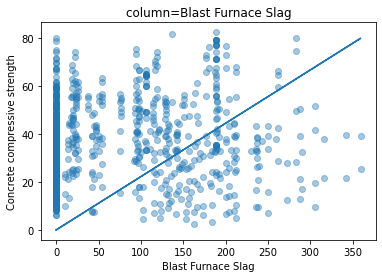

In [169]:
plt.title("column=Blast Furnace Slag")
plt.xlabel('Blast Furnace Slag')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x["Blast Furnace Slag"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x["Blast Furnace Slag"], m2*train_x["Blast Furnace Slag"]+b2)

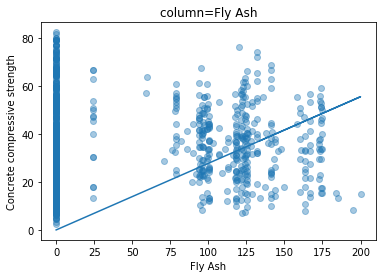

In [170]:
plt.title("column=Fly Ash")
plt.xlabel('Fly Ash')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x["Fly Ash"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x["Fly Ash"], m3*train_x["Fly Ash"]+b3)

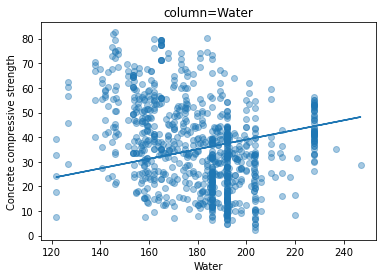

In [171]:
plt.title("column=Water")
plt.xlabel('Water')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x["Water"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x["Water"], m4*train_x["Water"]+b4)

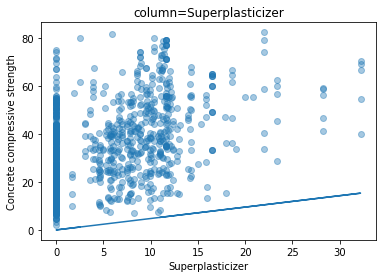

In [172]:
plt.title("column=Superplasticizer")
plt.xlabel('Superplasticizer')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x["Superplasticizer"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x["Superplasticizer"], m5*train_x["Superplasticizer"]+b5)

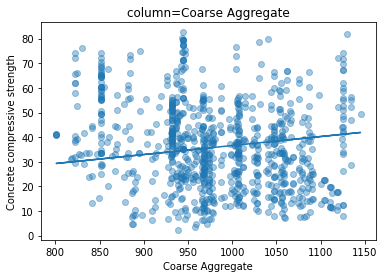

In [173]:
plt.title("column=Coarse Aggregate")
plt.xlabel('Coarse Aggregate')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x["Coarse Aggregate"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x["Coarse Aggregate"], m6*train_x["Coarse Aggregate"]+b6)

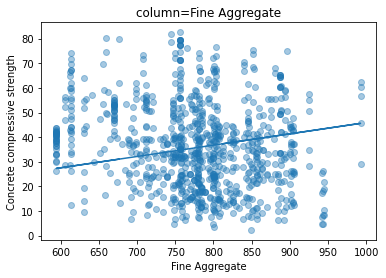

In [174]:
plt.title("column=Fine Aggregate")
plt.xlabel('Fine Aggregate')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x["Fine Aggregate"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x["Fine Aggregate"], m7*train_x["Fine Aggregate"]+b7)

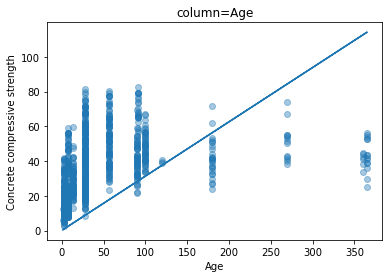

In [175]:
plt.title("column=Age")
plt.xlabel('Age')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x["Age"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x["Age"], m8*train_x["Age"]+b8)

!!!!After normalization!!!!

In [24]:
#normalization
def normalize_(x):
    xmean = np.mean(x, 0)
    std = np.std(x, 0)
    return (x - xmean) / std
data_normal = normalize_(data.loc[:,'Cement':'Age'])
data_normal.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,2.988252e-15,8.768606e-16,-1.798992e-16,7.400768e-16,4.690962e-16,6.068932e-15,1.225958e-14,7.546283e-16
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-2.212138e+00,-2.240917e+00,-7.073594e-01
25%,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-5.265174e-01,-5.319697e-01,-6.123314e-01
50%,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-6.329352e-02,7.386739e-02,-2.797331e-01
75%,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,7.267605e-01,6.291661e-01,1.637312e-01
max,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,2.214224e+00,2.733062e+00,5.057677e+00


C:\Users\13588\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\13588\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\13588\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:>

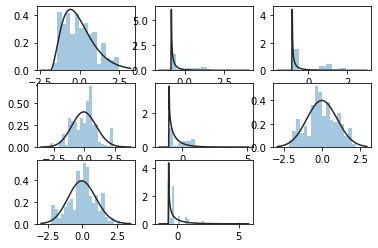

In [87]:
x1 = data_normal.iloc[:,[0]]
x2 = data_normal.iloc[:,[1]]
x3 = data_normal.iloc[:,[2]]
x4 = data_normal.iloc[:,[3]]
x5 = data_normal.iloc[:,[4]]
x6 = data_normal.iloc[:,[5]]
x7 = data_normal.iloc[:,[6]]
x8 = data_normal.iloc[:,[7]]
plt.subplot(331)
sns.distplot(x1,kde=False, fit=stats.gamma)
plt.subplot(332)
sns.distplot(x2,kde=False, fit=stats.gamma)
plt.subplot(333)
sns.distplot(x3,kde=False, fit=stats.gamma)
plt.subplot(334)
sns.distplot(x4,kde=False, fit=stats.gamma)
plt.subplot(335)
sns.distplot(x5,kde=False, fit=stats.gamma)
plt.subplot(336)
sns.distplot(x6,kde=False, fit=stats.gamma)
plt.subplot(337)
sns.distplot(x7,kde=False, fit=stats.gamma)
plt.subplot(338)
sns.distplot(x8,kde=False, fit=stats.gamma)

In [88]:
train_x_nor = data_normal.iloc[:900,[i for i in range(8)]]
test_x_nor = data_normal.iloc[900:,[i for i in range(8)]]

In [100]:
def grad_uni_nor(x, y, m, b, step_size=1e-01, max_iter=1000,stop_crit=1e-06):

    i = 0
    pre_loss, loss, deriv, deriv_b = 0.0, 0.0, 0.0, 0.0
    loss, deriv, deriv_b = uni_var_lr(x, y, m, b)
    m = m - step_size * deriv
    b = b - step_size * deriv_b
    while i < max_iter:
        if abs(pre_loss - loss) < stop_crit:
            break
        else:
            pre_loss = loss
            loss, deriv, deriv_b = uni_var_lr(x, y, m, b)
            m = m - step_size * deriv
            b = b - step_size * deriv_b
            i += 1

    return loss, m, b

In [101]:
mse1_nor, m1_nor, b1_nor = grad_uni_nor(train_x_nor["Cement"], train_y["Concrete compressive strength"], 0, 0)
print(mse1_nor, m1_nor, b1_nor)

228.3340434855913 8.208175520926337 35.63575337882354


In [102]:
mse2_nor, m2_nor, b2_nor = grad_uni_nor(train_x_nor["Blast Furnace Slag"], train_y["Concrete compressive strength"], 0, 0)
print(mse2_nor, m2_nor, b2_nor)

290.77549443884374 2.2682508858058146 36.515968119610385


In [103]:
mse3_nor, m3_nor, b3_nor = grad_uni_nor(train_x_nor["Fly Ash"], train_y["Concrete compressive strength"], 0, 0)
print(mse3_nor, m3_nor, b3_nor)

295.26540346314084 -0.8032430502489962 36.3093107001131


In [104]:
mse4_nor, m4_nor, b4_nor = grad_uni_nor(train_x_nor["Water"], train_y["Concrete compressive strength"], 0, 0)
print(mse4_nor, m4_nor, b4_nor)

270.1008324474609 -4.981688617685291 36.176672718268954


In [105]:
mse5_nor, m5_nor, b5_nor = grad_uni_nor(train_x_nor["Superplasticizer"], train_y["Concrete compressive strength"], 0, 0)
print(mse5_nor, m5_nor, b5_nor)

244.3148291300857 6.947787602831894 36.832167647382526


In [106]:
mse6_nor, m6_nor, b6_nor = grad_uni_nor(train_x_nor["Coarse Aggregate"], train_y["Concrete compressive strength"], 0, 0)
print(mse6_nor, m6_nor, b6_nor)

284.48595034188185 -3.4735768220082623 36.73834052165832


In [107]:
mse7_nor, m7_nor, b7_nor = grad_uni_nor(train_x_nor["Fine Aggregate"], train_y["Concrete compressive strength"], 0, 0)
print(mse7_nor, m7_nor, b7_nor)

286.3156244035479 -3.044593678046147 36.47475005899403


In [108]:
mse8_nor, m8_nor, b8_nor = grad_uni_nor(train_x_nor["Age"], train_y["Concrete compressive strength"], 0, 0)
print(mse8_nor, m8_nor, b8_nor)

262.9141369656602 5.396833293644298 36.15574657828291


In [110]:
uni_var_lr_tr(train_x_nor["Cement"], train_y["Concrete compressive strength"], m1_nor, b1_nor)

(228.33404299884822,
 0.2291135643249338,
 0.0010060816283495437,
 -0.0015981418795627494)

In [111]:
uni_var_lr_tr(train_x_nor["Blast Furnace Slag"], train_y["Concrete compressive strength"], m2_nor, b2_nor)

(290.7754938659153,
 0.01830282903069691,
 -0.0011336254619953223,
 -0.0016981997105725258)

In [112]:
uni_var_lr_tr(train_x_nor["Fly Ash"], train_y["Concrete compressive strength"], m3_nor, b3_nor)

(295.26540284035974,
 0.0031442925270865896,
 -0.0014628863213650887,
 -0.0015728215114470996)

In [113]:
uni_var_lr_tr(train_x_nor["Water"], train_y["Concrete compressive strength"], m4_nor, b4_nor)

(270.10083180796795,
 0.08810326848035865,
 -0.0005218959045527938,
 -0.002074528713903953)

In [114]:
uni_var_lr_tr(train_x_nor["Superplasticizer"], train_y["Concrete compressive strength"], m5_nor, b5_nor)

(244.31482860359938,
 0.17516028301682784,
 -0.000882189984536268,
 -0.001738298232052718)

In [115]:
uni_var_lr_tr(train_x_nor["Coarse Aggregate"], train_y["Concrete compressive strength"], m6_nor, b6_nor)

(284.48594970826065,
 0.03953717592893746,
 0.0015819185504857651,
 -0.001493576742992657)

In [116]:
uni_var_lr_tr(train_x_nor["Fine Aggregate"], train_y["Concrete compressive strength"], m7_nor, b7_nor)

(286.31562391545503,
 0.03335994974966905,
 0.0006167607029881949,
 -0.001764543975457242)

In [117]:
uni_var_lr_tr(train_x_nor["Age"], train_y["Concrete compressive strength"], m8_nor, b8_nor)

(262.91413634393194,
 0.11236651883843518,
 0.00040278889063193746,
 -0.002067983039700402)

In [118]:
uni_var_lr_te(test_x_nor["Cement"], test_y["Concrete compressive strength"], m1_nor, b1_nor)

(81.13423754410394,
 0.4397927894886936,
 -1.6619037963954613,
 -2.8762285533219596)

In [119]:
uni_var_lr_te(test_x_nor["Blast Furnace Slag"], test_y["Concrete compressive strength"], m2_nor, b2_nor)

(159.68330876374114,
 -0.10256463455546272,
 0.27599218020158706,
 11.072482354899234)

In [120]:
uni_var_lr_te(test_x_nor["Fly Ash"], test_y["Concrete compressive strength"], m3_nor, b3_nor)

(149.4432183661995, -0.03185992775554913, 15.263848593201038, 7.79688908917921)

In [121]:
uni_var_lr_te(test_x_nor["Water"], test_y["Concrete compressive strength"], m4_nor, b4_nor)

(154.98745707101685,
 -0.07014120817734626,
 -2.3019610758268056,
 5.698560580588773)

In [122]:
uni_var_lr_te(test_x_nor["Superplasticizer"], test_y["Concrete compressive strength"], m5_nor, b5_nor)

(235.26371748053927,
 -0.6244243477687144,
 13.239842933793645,
 16.083306323206582)

In [123]:
uni_var_lr_te(test_x_nor["Coarse Aggregate"], test_y["Concrete compressive strength"], m6_nor, b6_nor)

(190.24225549380344,
 -0.3135648586532842,
 -11.41320367800633,
 14.594813028344596)

In [124]:
uni_var_lr_te(test_x_nor["Fine Aggregate"], test_y["Concrete compressive strength"], m7_nor, b7_nor)

(168.98995502347475,
 -0.16682419375261115,
 -3.998469510761364,
 10.419793931581086)

In [125]:
uni_var_lr_te(test_x_nor["Age"], test_y["Concrete compressive strength"], m8_nor, b8_nor)

(150.91585653806334,
 -0.042028046016398646,
 -1.501304241098212,
 5.366916430757855)

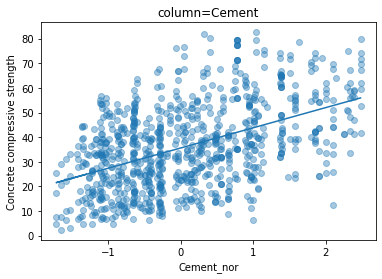

In [160]:
plt.title("column=Cement")
plt.xlabel('Cement_nor')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x_nor["Cement"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x_nor["Cement"], m1_nor*train_x_nor["Cement"]+b1_nor)

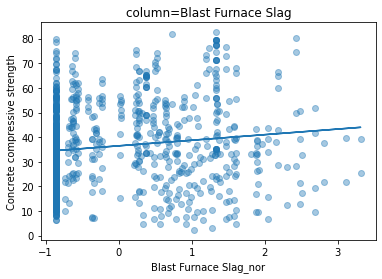

In [161]:
plt.title("column=Blast Furnace Slag")
plt.xlabel('Blast Furnace Slag_nor')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x_nor["Blast Furnace Slag"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x_nor["Blast Furnace Slag"], m2_nor*train_x_nor["Blast Furnace Slag"]+b2_nor)

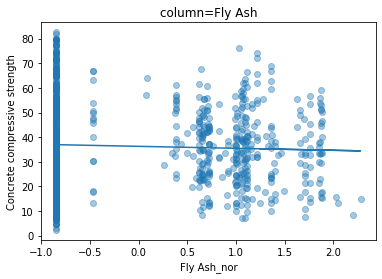

In [162]:
plt.title("column=Fly Ash")
plt.xlabel('Fly Ash_nor')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x_nor["Fly Ash"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x_nor["Fly Ash"], m3_nor*train_x_nor["Fly Ash"]+b3_nor)

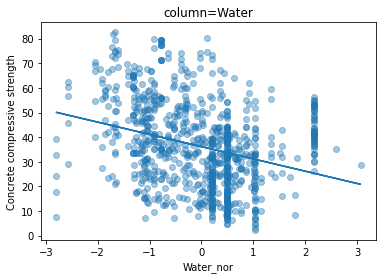

In [163]:
plt.title("column=Water")
plt.xlabel('Water_nor')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x_nor["Water"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x_nor["Water"], m4_nor*train_x_nor["Water"]+b4_nor)

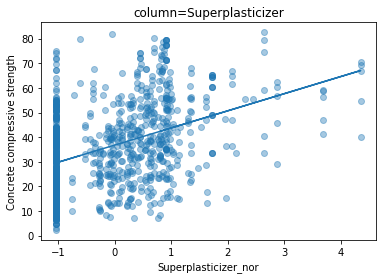

In [164]:
plt.title("column=Superplasticizer")
plt.xlabel('Superplasticizer_nor')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x_nor["Superplasticizer"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x_nor["Superplasticizer"], m5_nor*train_x_nor["Superplasticizer"]+b5_nor)

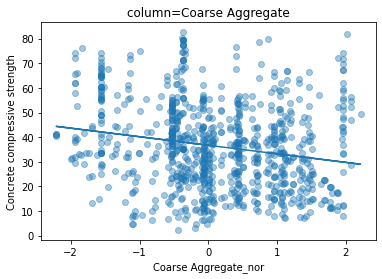

In [165]:
plt.title("column=Coarse Aggregate")
plt.xlabel('Coarse Aggregate_nor')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x_nor["Coarse Aggregate"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x_nor["Coarse Aggregate"], m6_nor*train_x_nor["Coarse Aggregate"]+b6_nor)

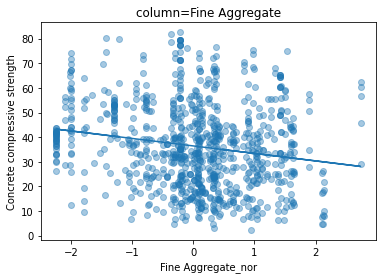

In [166]:
plt.title("column=Fine Aggregate")
plt.xlabel('Fine Aggregate_nor')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x_nor["Fine Aggregate"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x_nor["Fine Aggregate"], m7_nor*train_x_nor["Fine Aggregate"]+b7_nor)

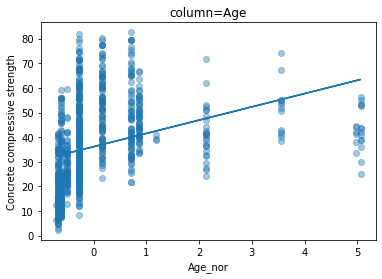

In [167]:
plt.title("column=Age")
plt.xlabel('Age_nor')
plt.ylabel('Concrete compressive strength')
plt.scatter(train_x_nor["Age"], train_y["Concrete compressive strength"], alpha=0.4)
plt.plot(train_x_nor["Age"], m8_nor*train_x_nor["Age"]+b8_nor)

# B) Multi-variate linear regression

In [2]:
data_new = pd.concat([pd.Series(1, index=data.index, name='const'), data], axis=1)
data_new.head()

,const,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,1,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
train_x_new = data_new.iloc[:900,[i for i in range(9)]]
test_x_new = data_new.iloc[900:,[i for i in range(9)]]
m = np.array([0] * len(train_x_new.columns))

In [4]:
def multi_var_lr(x, y, m):
    # y = f(x) = (m · x)
    sum1, sum2, sum3 = 0.0, 0.0, 0.0
    
    for i in range(x.shape[0]): #[0,899]
        for j in range(len(x.columns)): #[0,9)
            sum1 += m[j] * x.T[i][j]
        sum2 += (sum1 - y[i]) ** 2
        sum3 += 2 * x.T[i] * (sum1 - y[i]) 
        sum1 = 0
    multi_mse = sum2 / x.shape[0]
    multi_deriv = (sum3 / x.shape[0])
    
    return multi_mse, multi_deriv

In [5]:
def multi_var_lr_tr(x, y, m):
    # y = f(x) = (m · x)
    sum1, sum2, sum3 = 0.0, 0.0, 0.0
    
    for i in range(x.shape[0]): #[0,899]
        for j in range(len(x.columns)): #[0,9)
            sum1 += m[j] * x.T[i][j]
        sum2 += (sum1 - y[i]) ** 2
        sum3 += 2 * x.T[i] * (sum1 - y[i]) 
        sum1 = 0
    multi_mse = sum2 / x.shape[0]
    multi_deriv = (sum3 / x.shape[0])
    multi_explain = 1 - multi_mse / variance_train_y
    return multi_mse, multi_explain, multi_deriv

In [6]:
def multi_var_lr_te(x, y, m):
    # y = f(x) = (m · x)
    sum1, sum2, sum3 = 0.0, 0.0, 0.0
    
    for i in range(x.shape[0]): #[0,899]
        for j in range(len(x.columns)): #[0,9)
            sum1 += m[j] * x.T[i+900][j]
        sum2 += (sum1 - y[i+900]) ** 2
        sum3 += 2 * x.T[i+900] * (sum1 - y[i+900]) 
        sum1 = 0
    multi_mse = sum2 / x.shape[0]
    multi_deriv = (sum3 / x.shape[0])
    multi_explain = 1 - multi_mse / variance_test_y
    return multi_mse, multi_explain, multi_deriv

In [8]:
def grad_multi(x, y, m, step_size=1e-07, max_iter=1000,stop_crit=1e-06):

    i = 0
    pre_loss, loss, deriv = 0.0, 0.0, 0.0
    loss, deriv = multi_var_lr(x, y, m)
    m = m - step_size * deriv
    while i < max_iter:
        if abs(pre_loss - loss) < stop_crit:
            break
        else:
            pre_loss = loss
            loss, deriv = multi_var_lr(x, y, m)
            m = m - step_size * deriv
            i += 1
    m = m.tolist()
    return loss, m

!!!!Before normalization!!!!

In [12]:
grad_multi(train_x_new, train_y["Concrete compressive strength"], m) #07

(172.03899606600442,
 [3.790327243640112e-05,
  0.08086785968175879,
  0.042071073519139635,
  0.022220504160116176,
  -0.014110288180942418,
  0.008001481161360251,
  0.002876080547145025,
  0.007841241152307594,
  0.05146968947985563])

In [13]:
multi_var_lr_tr(train_x_new, train_y["Concrete compressive strength"], [3.790327243640112e-05,
  0.08086785968175879,
  0.042071073519139635,
  0.022220504160116176,
  -0.014110288180942418,
  0.008001481161360251,
  0.002876080547145025,
  0.007841241152307594,
  0.05146968947985563])

(172.00001209455345,
 0.41930482849503337,
 const                  -0.040069
 Cement               -248.069308
 Blast Furnace Slag   -276.460950
 Fly Ash              -316.053144
 Water                 204.375688
 Superplasticizer      -68.489840
 Coarse Aggregate       93.763973
 Fine Aggregate        -10.085225
 Age                  -310.291478
 Name: 0, dtype: float64)

In [14]:
multi_var_lr_te(test_x_new, test_y["Concrete compressive strength"], [3.790327243640112e-05,
  0.08086785968175879,
  0.042071073519139635,
  0.022220504160116176,
  -0.014110288180942418,
  0.008001481161360251,
  0.002876080547145025,
  0.007841241152307594,
  0.05146968947985563])

(58.00057117336752,
 0.5995237131866541,
 const                  -0.761959
 Cement               -723.416583
 Blast Furnace Slag   -653.183011
 Fly Ash               405.586048
 Water                -109.864132
 Superplasticizer        0.434593
 Coarse Aggregate     -515.593884
 Fine Aggregate       -442.716887
 Age                   -21.334843
 Name: 900, dtype: float64)

!!!!After normalization!!!!

In [25]:
data_new_normal = pd.concat([pd.Series(1, index=data_normal.index, name='const'), data_normal], axis=1)
data_new_normal.describe()

,const,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,1030.0,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,1.0,2.988252e-15,8.768606e-16,-1.798992e-16,7.400768e-16,4.690962e-16,6.068932e-15,1.225958e-14,7.546283e-16
std,0.0,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,1.0,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-2.212138e+00,-2.240917e+00,-7.073594e-01
25%,1.0,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-5.265174e-01,-5.319697e-01,-6.123314e-01
50%,1.0,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-6.329352e-02,7.386739e-02,-2.797331e-01
75%,1.0,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,7.267605e-01,6.291661e-01,1.637312e-01
max,1.0,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,2.214224e+00,2.733062e+00,5.057677e+00


In [26]:
train_x_new_nor = data_new_normal.iloc[:900,[i for i in range(9)]]
test_x_new_nor = data_new_normal.iloc[900:,[i for i in range(9)]]

In [27]:
def grad_multi_nor(x, y, m, step_size=1e-01, max_iter=1000,stop_crit=1e-06):

    i = 0
    pre_loss, loss, deriv = 0.0, 0.0, 0.0
    loss, deriv = multi_var_lr(x, y, m)
    m = m - step_size * deriv
    while i < max_iter:
        if abs(pre_loss - loss) < stop_crit:
            break
        else:
            pre_loss = loss
            loss, deriv = multi_var_lr(x, y, m)
            m = m - step_size * deriv
            i += 1
    m = m.tolist()
    return loss, m

In [28]:
grad_multi_nor(train_x_new_nor, train_y["Concrete compressive strength"], m) #01

(114.56613667462653,
 [35.83369375998126,
  11.571005552628092,
  8.15650791559382,
  5.493777838561696,
  -3.7613771190525522,
  1.8692987371552356,
  1.0194565404008968,
  0.8168865601983376,
  7.282783733758603])

In [69]:
multi_var_lr_tr(train_x_new_nor, train_y["Concrete compressive strength"], [35.83369375998126,
  11.571005552628092,
  8.15650791559382,
  5.493777838561696,
  -3.7613771190525522,
  1.8692987371552356,
  1.0194565404008968,
  0.8168865601983376,
  7.282783733758603])

(114.56613569485772,
 0.6132093189655459,
 const                 0.000055
 Cement               -0.001422
 Blast Furnace Slag   -0.001358
 Fly Ash              -0.001184
 Water                -0.001188
 Superplasticizer     -0.000103
 Coarse Aggregate     -0.001073
 Fine Aggregate       -0.001364
 Age                  -0.000049
 Name: 0, dtype: float64)

In [70]:
multi_var_lr_te(test_x_new_nor, test_y["Concrete compressive strength"], [35.83369375998126,
  11.571005552628092,
  8.15650791559382,
  5.493777838561696,
  -3.7613771190525522,
  1.8692987371552356,
  1.0194565404008968,
  0.8168865601983376,
  7.282783733758603])

(60.55973943597179,
 0.5818534354220632,
 const                 0.248921
 Cement               -6.123355
 Blast Furnace Slag   -3.498112
 Fly Ash               9.892336
 Water                -2.646149
 Superplasticizer      3.694138
 Coarse Aggregate      2.506636
 Fine Aggregate       -0.581853
 Age                  -0.069631
 Name: 900, dtype: float64)

# C) Multi-variate polynomial regression

In [31]:
data_p = data
for i in range(data.shape[1]-1):
    for j in range(i, data.shape[1]-1):
        data_p = pd.concat([data[headlist[i]]*data[headlist[j]], data_p], axis=1)
data_poly = pd.concat([pd.Series(1, index=data.index, name='const'), data_p], axis=1)
data_poly.to_csv('C:/Users/13588/Desktop/第二学期/CSE 514/assignment 1/data_poly_touse.csv',encoding='gbk')

In [32]:
headlist1 = ['const','1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th','11st','12nd','13rd','14th','15th','16th','17th','18th','19th','20th','21st','22nd','23rd','24th','25th','26th','27th','28th','29th','30th','31st','32nd','33rd','34th','35th','36th','37th','38th','39th','40th','41st','42nd','43rd','44th','Concrete compressive strength']
data_poly_touse = pd.read_csv("data_poly_touse.csv", header = 0)
data_poly_touse.head

<bound method NDFrame.head of       const     1st       2nd        3rd       4th        5th         6th  \
0         1     784   18928.0  456976.00   29120.0  703040.00  1081600.00   
1         1     784   18928.0  456976.00   29540.0  713180.00  1113025.00   
2         1   72900  160380.0  352836.00  251640.0  553608.00   868624.00   
3         1  133225  216810.0  352836.00  340180.0  553608.00   868624.00   
4         1  129600  297180.0  681450.25  352224.0  807669.20   957266.56   
...     ...     ...       ...        ...       ...        ...         ...   
1025      1     784   21512.4  590284.89   24362.8  668497.83   757074.01   
1026      1     784   22775.2  661619.56   22901.2  665279.86   668960.41   
1027      1     784   21840.0  608400.00   24987.2  696072.00   796377.76   
1028      1     784   22089.2  622363.21   27708.8  780695.44   979308.16   
1029      1     784   21322.0  579882.25   24206.0  658316.75   747360.25   

        7th      8th       9th  ...       36t

In [33]:
train_x_poly = data_poly_touse.iloc[:900,[i for i in range(45)]]
test_x_poly = data_poly_touse.iloc[900:,[i for i in range(45)]]
m_poly = np.array([0] * len(train_x_poly.columns))

In [34]:
def multi_var_poly_lr(x, y, m):
    # y = f(x) = (m · x)
    sum1, sum2, sum3 = 0.0, 0.0, 0.0
    
    for i in range(x.shape[0]): #[0,899]
        for j in range(len(x.columns)): #[0,45)
            sum1 += m[j] * x.T[i][j]
        sum2 += (sum1 - y[i]) ** 2
        sum3 += 2 * x.T[i] * (sum1 - y[i])
        sum1 = 0
    multi_poly_mse = sum2 / x.shape[0]
    multi_poly_deriv = (sum3 / x.shape[0])
    
    return multi_poly_mse, multi_poly_deriv

In [35]:
def multi_var_poly_lr_tr(x, y, m):
    # y = f(x) = (m · x)
    sum1, sum2, sum3 = 0.0, 0.0, 0.0
    
    for i in range(x.shape[0]): #[0,899]
        for j in range(len(x.columns)): #[0,45)
            sum1 += m[j] * x.T[i][j]
        sum2 += (sum1 - y[i]) ** 2
        sum3 += 2 * x.T[i] * (sum1 - y[i])
        sum1 = 0
    multi_poly_mse = sum2 / x.shape[0]
    multi_poly_deriv = (sum3 / x.shape[0])
    multi_poly_explain = 1 - multi_poly_mse / variance_train_y
    return multi_poly_mse, multi_poly_explain, multi_poly_deriv

In [36]:
def multi_var_poly_lr_te(x, y, m):
    # y = f(x) = (m · x)
    sum1, sum2, sum3 = 0.0, 0.0, 0.0
    
    for i in range(x.shape[0]): #[0,899]
        for j in range(len(x.columns)): #[0,45)
            sum1 += m[j] * x.T[i+900][j]
        sum2 += (sum1 - y[i+900]) ** 2
        sum3 += 2 * x.T[i+900] * (sum1 - y[i+900])
        sum1 = 0
    multi_poly_mse = sum2 / x.shape[0]
    multi_poly_deriv = (sum3 / x.shape[0])
    multi_poly_explain = 1 - multi_poly_mse / variance_test_y
    return multi_poly_mse, multi_poly_explain, multi_poly_deriv

In [37]:
def grad_multi_poly(x, y, m, step_size=1e-013, max_iter=1000,stop_crit=1e-06):

    i = 0
    pre_loss, loss, deriv = 0.0, 0.0, 0.0
    loss, deriv = multi_var_poly_lr(x, y, m)
    m = m - step_size * deriv
    while i < max_iter:
        if abs(pre_loss - loss) < stop_crit:
            break
        else:
            pre_loss = loss
            loss, deriv = multi_var_poly_lr(x, y, m)
            m = m - step_size * deriv
            i += 1
    m = m.tolist()
    return loss, m

!!!!Before normalization!!!!

In [38]:
grad_multi_poly(train_x_poly, train_y["Concrete compressive strength"], m_poly)

(147.7534862427133,
 [6.25302469687737e-11,
  1.5970274059632005e-06,
  3.271399585260447e-05,
  5.430828560723212e-06,
  4.211526984725497e-05,
  1.966238653423182e-06,
  -2.32249829456496e-06,
  5.468981035836778e-07,
  5.7146733784934444e-06,
  6.9328390049009715e-06,
  9.932114003763194e-08,
  7.108036025619448e-06,
  -9.220739570364251e-06,
  -1.2198106436119545e-05,
  1.1589200372421938e-06,
  -3.98252041358304e-06,
  3.383235471344772e-06,
  2.294734806683279e-05,
  2.9052844023801458e-05,
  3.2739591932856567e-07,
  4.710722991484205e-06,
  3.850459487282615e-06,
  5.518943760087005e-06,
  3.148212617380582e-05,
  3.849366252658102e-05,
  8.661279718354981e-07,
  6.336622807458082e-06,
  2.0439425902035464e-06,
  5.820747629226773e-06,
  1.3355869362121036e-05,
  4.3306889523000073e-05,
  4.815681965565363e-05,
  2.5287307565729075e-06,
  5.402499275441506e-06,
  8.299803251642924e-06,
  1.855399450553925e-05,
  3.2791938672640706e-05,
  6.157442036995578e-08,
  4.2238790338508

In [39]:
multi_var_poly_lr_tr(train_x_poly, train_y["Concrete compressive strength"], [6.25302469687737e-11,
  1.5970274059632005e-06,
  3.271399585260447e-05,
  5.430828560723212e-06,
  4.211526984725497e-05,
  1.966238653423182e-06,
  -2.32249829456496e-06,
  5.468981035836778e-07,
  5.7146733784934444e-06,
  6.9328390049009715e-06,
  9.932114003763194e-08,
  7.108036025619448e-06,
  -9.220739570364251e-06,
  -1.2198106436119545e-05,
  1.1589200372421938e-06,
  -3.98252041358304e-06,
  3.383235471344772e-06,
  2.294734806683279e-05,
  2.9052844023801458e-05,
  3.2739591932856567e-07,
  4.710722991484205e-06,
  3.850459487282615e-06,
  5.518943760087005e-06,
  3.148212617380582e-05,
  3.849366252658102e-05,
  8.661279718354981e-07,
  6.336622807458082e-06,
  2.0439425902035464e-06,
  5.820747629226773e-06,
  1.3355869362121036e-05,
  4.3306889523000073e-05,
  4.815681965565363e-05,
  2.5287307565729075e-06,
  5.402499275441506e-06,
  8.299803251642924e-06,
  1.855399450553925e-05,
  3.2791938672640706e-05,
  6.157442036995578e-08,
  4.223879033850882e-08,
  2.985144785279869e-08,
  -6.284927036747852e-09,
  7.309564422459924e-09,
  2.8728229981900896e-08,
  2.7728323863751732e-08,
  4.3602101662834474e-08])

(147.71625143763967,
 0.5012900701687382,
 const        -0.097904
 1st       48035.507957
 2nd     -166339.028488
 3rd       14841.719156
 4th     -200874.588796
 5th       13482.832682
 6th       45418.021387
 7th       -4614.190581
 8th      -42851.561690
 9th      -53864.258518
 10th       -659.355064
 11th     -23593.877748
 12th     120878.711102
 13th     160158.208259
 14th      -8778.157327
 15th      54680.802678
 16th     -32561.579698
 17th    -238650.191374
 18th    -306035.440808
 19th      -3153.011220
 20th     -47505.589849
 21st     -39112.512447
 22ed     -32646.175016
 23rd    -153723.453870
 24th    -179481.261638
 25th      -6070.567463
 26th     -23657.757798
 27th     -16687.073652
 28th     -14800.895141
 29th     -46493.660519
 30th     -97461.150248
 31st     -78473.381651
 32ed     -16966.834366
 33rd      30286.105466
 34th     -71073.046261
 35th     -99782.764215
 36th     -54786.467156
 37th       -119.196143
 38th       -196.006982
 39th       -302.85910

In [40]:
multi_var_poly_lr_te(test_x_poly, test_y["Concrete compressive strength"], [6.25302469687737e-11,
  1.5970274059632005e-06,
  3.271399585260447e-05,
  5.430828560723212e-06,
  4.211526984725497e-05,
  1.966238653423182e-06,
  -2.32249829456496e-06,
  5.468981035836778e-07,
  5.7146733784934444e-06,
  6.9328390049009715e-06,
  9.932114003763194e-08,
  7.108036025619448e-06,
  -9.220739570364251e-06,
  -1.2198106436119545e-05,
  1.1589200372421938e-06,
  -3.98252041358304e-06,
  3.383235471344772e-06,
  2.294734806683279e-05,
  2.9052844023801458e-05,
  3.2739591932856567e-07,
  4.710722991484205e-06,
  3.850459487282615e-06,
  5.518943760087005e-06,
  3.148212617380582e-05,
  3.849366252658102e-05,
  8.661279718354981e-07,
  6.336622807458082e-06,
  2.0439425902035464e-06,
  5.820747629226773e-06,
  1.3355869362121036e-05,
  4.3306889523000073e-05,
  4.815681965565363e-05,
  2.5287307565729075e-06,
  5.402499275441506e-06,
  8.299803251642924e-06,
  1.855399450553925e-05,
  3.2791938672640706e-05,
  6.157442036995578e-08,
  4.223879033850882e-08,
  2.985144785279869e-08,
  -6.284927036747852e-09,
  7.309564422459924e-09,
  2.8728229981900896e-08,
  2.7728323863751732e-08,
  4.3602101662834474e-08])
 

(53.672567227776774,
 0.6294072628548608,
 const   -2.187141e+00
 1st     -1.714719e+03
 2nd     -4.229850e+04
 3rd     -1.021294e+06
 4th     -5.196387e+04
 5th     -1.275281e+06
 6th     -1.571197e+06
 7th     -3.247678e+02
 8th     -7.104979e+03
 9th     -9.563430e+03
 10th    -3.215775e+01
 11th    -1.101754e+04
 12th    -2.702633e+05
 13th    -3.319851e+05
 14th    -1.998747e+03
 15th    -7.115424e+04
 16th     7.603257e+03
 17th     2.255679e+05
 18th     2.626964e+05
 19th     3.255042e+03
 20th     5.105291e+04
 21st     6.214302e+04
 22ed    -2.017134e+04
 23rd    -5.408561e+05
 24th    -6.459922e+05
 25th    -6.424089e+03
 26th    -1.321885e+05
 27th    -1.924181e+04
 28th    -1.241806e+05
 29th    -2.917127e+04
 30th    -7.683534e+05
 31st    -9.108060e+05
 32ed    -7.045436e+03
 33rd    -1.910168e+05
 34th     1.463219e+04
 35th    -2.022979e+05
 36th    -3.802507e+05
 37th    -1.041831e+03
 38th    -7.204049e+02
 39th     2.715449e+02
 40th    -3.934837e+02
 41st    -1.159

!!!!After normalization!!!!

In [41]:
data_poly_touse_normal = normalize_(data_poly_touse.loc[:,'1st':'44th'])
data_poly_touse_normal_cons = pd.concat([pd.Series(1, index=data_poly_touse_normal.index, name='const'), data_poly_touse_normal], axis=1)
data_poly_touse_normal_cons.describe()

,const,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,...,35th,36th,37th,38th,39th,40th,41st,42ed,43rd,44th
count,1030.0,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,...,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,1.0,4.091657e-16,-9.429889e-16,1.909287e-15,2.992213e-16,4.253124e-15,8.692076e-15,-1.227039e-16,6.941050e-16,9.117302e-16,...,1.191765e-15,-2.300048e-15,2.988252e-15,8.768606e-16,-1.798992e-16,7.400768e-16,4.690962e-16,6.068932e-15,1.225958e-14,7.546283e-16
std,0.0,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,...,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,1.0,-3.007307e-01,-7.378385e-01,-2.054391e+00,-7.075947e-01,-2.643106e+00,-2.057637e+00,-6.652341e-01,-1.000521e+00,-1.061268e+00,...,-8.136983e-01,-1.216414e+00,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-2.212138e+00,-2.240917e+00,-7.073594e-01
25%,1.0,-2.983528e-01,-6.096014e-01,-5.751998e-01,-5.950662e-01,-6.979868e-01,-5.556568e-01,-6.652341e-01,-1.000521e+00,-1.061268e+00,...,-8.136983e-01,-8.096620e-01,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-5.265174e-01,-5.319697e-01,-6.123314e-01
50%,1.0,-2.619417e-01,-2.884427e-01,2.259371e-02,-2.928241e-01,5.061664e-02,-1.031237e-01,-3.933555e-01,-2.094707e-02,6.429002e-02,...,-4.695062e-01,-2.368532e-01,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-6.329352e-02,7.386739e-02,-2.797331e-01
75%,1.0,-1.454262e-01,1.694755e-01,6.042809e-01,1.363346e-01,7.994050e-01,7.082626e-01,2.454485e-01,6.144042e-01,6.921690e-01,...,5.499964e-01,4.974012e-01,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,7.267605e-01,6.291661e-01,1.637312e-01
max,1.0,6.299042e+00,6.275259e+00,3.101046e+00,5.415654e+00,2.245320e+00,2.371260e+00,8.587478e+00,4.518477e+00,3.863085e+00,...,3.257124e+00,3.082741e+00,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,2.214224e+00,2.733062e+00,5.057677e+00


In [42]:
train_x_poly_nor = data_poly_touse_normal_cons.iloc[:900,[i for i in range(45)]]
test_x_poly_nor = data_poly_touse_normal_cons.iloc[900:,[i for i in range(45)]]

In [65]:
def grad_multi_poly1(x, y, m, step_size=1e-02, max_iter=1000,stop_crit=1e-06):

    i = 0
    pre_loss, loss, deriv = 0.0, 0.0, 0.0
    loss, deriv = multi_var_poly_lr(x, y, m)
    m = m - step_size * deriv
    while i < max_iter:
        if abs(pre_loss - loss) < stop_crit:
            break
        else:
            pre_loss = loss
            loss, deriv = multi_var_poly_lr(x, y, m)
            m = m - step_size * deriv
            i += 1
    m = m.tolist()
    return loss, m

In [66]:
grad_multi_poly1(train_x_poly_nor, train_y["Concrete compressive strength"], m_poly)

(64.2623295287627,
 [36.037965362019975,
  -10.27605384374023,
  4.562331595662635,
  -1.3780001646469,
  3.149386604222147,
  0.44099778838969683,
  -0.4320140890822067,
  2.357674731052929,
  0.31611972717603865,
  1.6393178168920268,
  -4.30368014326168,
  2.045183493030496,
  -1.0326746279457137,
  -2.1640910323728377,
  0.976358890495911,
  -0.6940090284985427,
  1.9450796153186125,
  0.9600291597612411,
  0.2033614872160939,
  -0.5733124768718575,
  -0.0832646559353098,
  -1.2680728837476705,
  2.3480440799773947,
  1.9676596385008127,
  0.6295303809656915,
  1.3964144599407597,
  0.9445238053711656,
  0.7985967770411262,
  -1.4632658090047541,
  1.6274530541367977,
  1.9056955594390812,
  3.0784868372335454,
  -0.08202169697824342,
  0.31621324542789037,
  1.1596815031334955,
  0.9101352017391915,
  1.5474921902457461,
  2.196340023711101,
  0.9077932318260713,
  0.09051885105090007,
  -1.2100517093034928,
  0.6348069565298674,
  -0.09263859533483805,
  -0.21044490271986932,
  3

In [67]:
multi_var_poly_lr_tr(train_x_poly_nor, train_y["Concrete compressive strength"], [36.037965362019975,
  -10.27605384374023,
  4.562331595662635,
  -1.3780001646469,
  3.149386604222147,
  0.44099778838969683,
  -0.4320140890822067,
  2.357674731052929,
  0.31611972717603865,
  1.6393178168920268,
  -4.30368014326168,
  2.045183493030496,
  -1.0326746279457137,
  -2.1640910323728377,
  0.976358890495911,
  -0.6940090284985427,
  1.9450796153186125,
  0.9600291597612411,
  0.2033614872160939,
  -0.5733124768718575,
  -0.0832646559353098,
  -1.2680728837476705,
  2.3480440799773947,
  1.9676596385008127,
  0.6295303809656915,
  1.3964144599407597,
  0.9445238053711656,
  0.7985967770411262,
  -1.4632658090047541,
  1.6274530541367977,
  1.9056955594390812,
  3.0784868372335454,
  -0.08202169697824342,
  0.31621324542789037,
  1.1596815031334955,
  0.9101352017391915,
  1.5474921902457461,
  2.196340023711101,
  0.9077932318260713,
  0.09051885105090007,
  -1.2100517093034928,
  0.6348069565298674,
  -0.09263859533483805,
  -0.21044490271986932,
  3.1127664269469157])

(64.2591715807568,
 0.78305239512808,
 const   -0.005408
 1st      0.389180
 2nd     -0.187978
 3rd      0.115997
 4th     -0.072259
 5th     -0.062385
 6th      0.026330
 7th      0.094994
 8th     -0.028030
 9th     -0.070655
 10th     0.065778
 11th    -0.075383
 12th    -0.018798
 13th     0.077506
 14th    -0.029510
 15th    -0.058038
 16th     0.064011
 17th    -0.067043
 18th     0.014251
 19th     0.042531
 20th    -0.012212
 21st    -0.000064
 22ed     0.011492
 23rd    -0.078552
 24th     0.026050
 25th     0.023264
 26th    -0.042899
 27th     0.012769
 28th     0.034704
 29th     0.019191
 30th    -0.025349
 31st    -0.111072
 32ed    -0.005063
 33rd     0.126057
 34th     0.026964
 35th     0.080944
 36th     0.029874
 37th    -0.024391
 38th    -0.011329
 39th     0.005880
 40th    -0.009986
 41st    -0.027945
 42ed     0.003859
 43rd     0.008067
 44th    -0.095399
 Name: 0, dtype: float64)

In [68]:
multi_var_poly_lr_te(test_x_poly_nor, test_y["Concrete compressive strength"], [36.037965362019975,
  -10.27605384374023,
  4.562331595662635,
  -1.3780001646469,
  3.149386604222147,
  0.44099778838969683,
  -0.4320140890822067,
  2.357674731052929,
  0.31611972717603865,
  1.6393178168920268,
  -4.30368014326168,
  2.045183493030496,
  -1.0326746279457137,
  -2.1640910323728377,
  0.976358890495911,
  -0.6940090284985427,
  1.9450796153186125,
  0.9600291597612411,
  0.2033614872160939,
  -0.5733124768718575,
  -0.0832646559353098,
  -1.2680728837476705,
  2.3480440799773947,
  1.9676596385008127,
  0.6295303809656915,
  1.3964144599407597,
  0.9445238053711656,
  0.7985967770411262,
  -1.4632658090047541,
  1.6274530541367977,
  1.9056955594390812,
  3.0784868372335454,
  -0.08202169697824342,
  0.31621324542789037,
  1.1596815031334955,
  0.9101352017391915,
  1.5474921902457461,
  2.196340023711101,
  0.9077932318260713,
  0.09051885105090007,
  -1.2100517093034928,
  0.6348069565298674,
  -0.09263859533483805,
  -0.21044490271986932,
  3.1127664269469157])

(44.37182781306488,
 0.6936260370853577,
 const     3.523663
 1st      -0.922994
 2nd      -1.087492
 3rd      -1.962065
 4th      -0.988148
 5th      -1.788845
 6th      -0.171763
 7th       1.575843
 8th       3.138698
 9th       3.853750
 10th      2.574097
 11th     -0.991446
 12th     -2.718742
 13th     -0.856329
 14th      4.438768
 15th     -1.000558
 16th      4.171291
 17th      7.341412
 18th      7.456230
 19th      8.808922
 20th      8.560087
 21st      9.265266
 22ed     -0.325895
 23rd      0.160519
 24th      0.625767
 25th      2.683491
 26th      0.388140
 27th     10.723429
 28th      0.254473
 29th     -1.819188
 30th     -7.306700
 31st     -6.396569
 32ed     -0.294916
 33rd     -7.026353
 34th      3.944678
 35th     -2.200058
 36th     -5.497101
 37th     -6.791015
 38th      0.568117
 39th      8.021241
 40th     -0.924993
 41st      3.763519
 42ed     -0.079170
 43rd     -2.065209
 44th     -0.985685
 Name: 900, dtype: float64)